In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [14]:

df = pd.read_csv("E:\code alpha\code-alpha-task-3-main\housing.csv")

df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
df.isnull().sum()

df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [16]:
X = df.drop(columns='median_house_value')  # Features
y = df['median_house_value']  # Target (house prices)

X.shape, y.shape


((20640, 12), (20640,))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((16512, 12), (4128, 12), (16512,), (4128,))

In [18]:
model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [19]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 4904399775.949268
R-squared: 0.6257351821159711


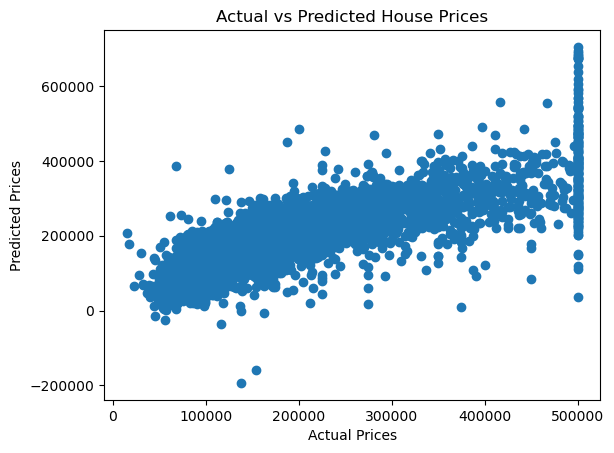

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [21]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions_df.head()


                              Coefficient
longitude                   -26838.273372
latitude                    -25468.352050
housing_median_age            1102.185084
total_rooms                     -6.021506
total_bedrooms                 102.789395
population                     -38.172906
households                      48.252753
median_income                39473.975175
ocean_proximity_INLAND      -39786.656161
ocean_proximity_ISLAND      136125.072615
ocean_proximity_NEAR BAY     -5136.642217
ocean_proximity_NEAR OCEAN    3431.140073


,Actual,Predicted
20046,47700.0,64629.450798
3024,45800.0,134799.340836
15663,500001.0,266063.381391
20484,218600.0,278576.433468
9814,278000.0,273343.436715
